# Preprocessing

In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## One-Hot Encode Genres

In [21]:
songs = pd.read_csv('../data/song_list_v2.csv').set_index('s_song_id')
gs = pd.read_csv('../data/gsong_lookup.csv').set_index('gs_id')

In [22]:
gsg = gs[['song_id', 'genre_name']].set_index('song_id')

In [23]:
genre_dummies = pd.get_dummies(gsg).groupby(['song_id']).sum()

In [24]:
genre_dummies.shape

(21033, 561)

In [25]:
genre_dummies.head()

,genre_name_a cappella,genre_name_acid house,genre_name_acid jazz,genre_name_acoustic blues,genre_name_acoustic pop,genre_name_acoustic punk,genre_name_adult standards,genre_name_african rock,genre_name_album rock,genre_name_albuquerque indie,...,genre_name_vogue,genre_name_west coast rap,genre_name_west coast trap,genre_name_western swing,genre_name_world,genre_name_world worship,genre_name_worship,genre_name_wrestling,genre_name_yugoslav rock,genre_name_zolo
song_id,,,,,,,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001wUOgo8t9VElHl45bxzr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003eoIwxETJujVWmNFMoZy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003z5LtGJ2cdJARKIO9LgL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
004S8bMhFQjnbuqvdh6W71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
songs.shape

(22914, 8)

In [26]:
for sid in songs.index:
    if sid not in genre_dummies.index:
        genre_dummies.loc[sid] = 0

In [27]:
genre_dummies.shape

(22914, 561)

In [28]:
genre_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22914 entries, 000xQL6tZNLJzIrtIgxqSl to 2PfrT8OeF0I565L7CRud27
Columns: 561 entries, genre_name_a cappella to genre_name_zolo
dtypes: int64(561)
memory usage: 98.9+ MB


In [29]:
genre_dummies[genre_dummies.isnull().any(1)]

,genre_name_a cappella,genre_name_acid house,genre_name_acid jazz,genre_name_acoustic blues,genre_name_acoustic pop,genre_name_acoustic punk,genre_name_adult standards,genre_name_african rock,genre_name_album rock,genre_name_albuquerque indie,...,genre_name_vogue,genre_name_west coast rap,genre_name_west coast trap,genre_name_western swing,genre_name_world,genre_name_world worship,genre_name_worship,genre_name_wrestling,genre_name_yugoslav rock,genre_name_zolo
song_id,,,,,,,,,,,,,,,,,,,,,


In [31]:
genre_dummies.rename(columns = lambda x: x.replace('genre_name_', 'genre_'), inplace=True)

In [32]:
genre_dummies.to_csv('../data/genre_dummies.csv')

## One-Hot Encoding Additional Features

I'm going to also one-hot encode the key and time signature features, since despite their numerical represenation, there is not an actual ordinal relationship between them.

In [6]:
main_wfeats.columns

Index(['album_release_date', 'artist_id', 'artist_name', 'duration_ms',
       'explicit', 'linked_album', 'song_title', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'key_changes', 'mean_song_conf', 'mean_loudness', 'mean_mode',
       'mean_mode_conf', 'mean_tempo', 'mean_tempo_conf', 'var_song_conf',
       'var_loudness', 'var_mode', 'var_mode_conf', 'var_tempo',
       'var_tempo_conf', 'tm_dim_1', 'tm_dim_2', 'tm_dim_3', 'tm_dim_4',
       'tm_dim_5', 'tm_dim_6', 'tm_dim_7', 'tm_dim_8', 'tm_dim_9', 'tm_dim_10',
       'tm_dim_11', 'tm_dim_12', 'tv_dim_1', 'tv_dim_2', 'tv_dim_3',
       'tv_dim_4', 'tv_dim_5', 'tv_dim_6', 'tv_dim_7', 'tv_dim_8', 'tv_dim_9',
       'tv_dim_10', 'tv_dim_11', 'tv_dim_12', 'pm_dim_1', 'pm_dim_2',
       'pm_dim_3', 'pm_dim_4', 'pm_dim_5', 'pm_dim_6', 'pm_dim_7', 'pm_dim_8',
       'pm_dim_9', 'pm_dim_10', 'pm_dim_11', 'pm_di

In [2]:
main_wfeats = pd.read_csv('../data/main_wfeats.csv', index_col='song_id')

In [4]:
main_wfeats.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
main_wfeats.head()

,album_release_date,artist_id,artist_name,duration_ms,explicit,linked_album,song_title,danceability,energy,key,...,pv_dim_3,pv_dim_4,pv_dim_5,pv_dim_6,pv_dim_7,pv_dim_8,pv_dim_9,pv_dim_10,pv_dim_11,pv_dim_12
song_id,,,,,,,,,,,,,,,,,,,,,
6SluaPiV04KOaRTOIScoff,1995-10-13,6UE7nl9mha6s8z0wFQFIZ2,Robyn,229226.0,False,Robyn Is Here,Show Me Love - Radio Version,0.546,0.643,6,...,0.231588,0.227392,0.365724,0.220462,0.367808,0.267055,0.344281,0.349016,0.323426,0.480299
5qEVq3ZEGr0Got441lueWS,2018-08-10,6S58b0fr8TkWrEHOH4tRVu,Switchfoot,247240.0,False,You Found Me (Unbroken: Path To Redemption),You Found Me (Unbroken: Path To Redemption),0.603,0.802,11,...,0.384941,0.397085,0.465443,0.237421,0.359981,0.209631,0.283483,0.188632,0.212271,0.490470
5kqIPrATaCc2LqxVWzQGbk,2016-04-01,25u4wHJWxCA9vO0CzxAbK7,Lukas Graham,237300.0,False,Lukas Graham,7 Years,0.765,0.473,10,...,0.341671,0.321183,0.195459,0.330539,0.175221,0.328568,0.153059,0.221073,0.444818,0.203276
3aVyHFxRkf8lSjhWdJ68AW,2013-01-01,0C0XlULifJtAgn6ZNCW2eu,The Killers,262000.0,False,Direct Hits,Just Another Girl,0.547,0.779,1,...,0.229995,0.264792,0.180531,0.281061,0.355194,0.189039,0.256742,0.193406,0.253140,0.308046
0zIyxS6QxZogHOpGkI6IZH,2018-09-07,0le01dl1WllSHhjEXRl4in,Tamia,236545.0,False,Passion Like Fire,Deeper,0.438,0.288,9,...,0.233717,0.128174,0.321370,0.200370,0.391387,0.132925,0.265942,0.537358,0.158429,0.266790


In [14]:
main_wfeats[['key', 'time_signature']] = main_wfeats[['key', 'time_signature']].astype('category', copy=False)

In [17]:
tk_dummies = pd.get_dummies(main_wfeats[['key', 'time_signature']])

In [20]:
main_wfeats = main_wfeats.drop(['key', 'time_signature'], 1).merge(tk_dummies, left_on='song_id', right_on='song_id')

In [34]:
main_wfeats.shape

(22901, 94)

## Merging all One-Hot Encoded Features

In [36]:
main_wfeats = main_wfeats.merge(genre_dummies, left_on='song_id', right_on='song_id')

##### Sanity Check for null values

In [38]:
main_wfeats[main_wfeats.isnull().any(1)]

,album_release_date,artist_id,artist_name,duration_ms,explicit,linked_album,song_title,danceability,energy,loudness,...,genre_vogue,genre_west coast rap,genre_west coast trap,genre_western swing,genre_world,genre_world worship,genre_worship,genre_wrestling,genre_yugoslav rock,genre_zolo
song_id,,,,,,,,,,,,,,,,,,,,,


## Dropping Columns Before Conducting SVD

I'm going to get rid of `duration_ms`, `artist_id`, `artist_name`, `linked_album`, and `song_title` before tossing into SVD.

In [40]:
main_wfeats.drop(['artist_id', 'artist_name', 'duration_ms', 'linked_album', 'song_title'], 1, inplace=True)

In [47]:
main_wfeats['album_release_date'] = main_wfeats['album_release_date'].apply(lambda x: x + '-01-01' if len(x) == 4 else x)
main_wfeats['album_release_date'] = main_wfeats['album_release_date'].apply(lambda x: re.sub(r'(-\d*)','',x))
main_wfeats['album_release_date'] = main_wfeats['album_release_date'].apply(lambda x: int(x))

## Computing SVD

I'll start with truncating my feature set to 100 with SVD.

In [116]:
SVD = TruncatedSVD(100)
svd_matrix = SVD.fit_transform(main_wfeats)

Since the similarty scores of the first cosine similarity matrix were so wildly close, I'm going to try and adjust the SVD matrix by first normalizing each of the input features.

CONSIDER DELETING: In addition, since so few components explained any variance within the matrix, I'll limit the number of components by 0.

In [215]:
ss = StandardScaler()
main_wfeats_scaled = ss.fit_transform(main_wfeats)
SVDs = TruncatedSVD(200)
svds_matrix = SVDs.fit_transform(main_wfeats_scaled)

##### Sanity Check for # of Components

In [117]:
svd_matrix.shape

(22901, 100)

In [209]:
svds_matrix.shape

(22901, 30)

### Examining the Explained Variance Ratio through each Component

In [203]:
SVD.explained_variance_ratio_[:5]

array([ 0.54859236,  0.22873037,  0.09898175,  0.05978819,  0.02269177])

In [213]:
SVDs.explained_variance_ratio_

array([ 0.02684854,  0.01833985,  0.01168428,  0.01045264,  0.00990746,
        0.0094    ,  0.0087815 ,  0.00852961,  0.00831913,  0.00802687,
        0.00772309,  0.00761586,  0.00734242,  0.0069733 ,  0.00659094,
        0.00653224,  0.00638289,  0.00636435,  0.00615177,  0.00599441,
        0.00595058,  0.00578646,  0.00562831,  0.00556003,  0.00541903,
        0.00533333,  0.0053035 ,  0.00522575,  0.00513129,  0.00505526,
        0.00501104,  0.00495211,  0.00483908,  0.0046762 ,  0.00460083,
        0.00458684,  0.00449582,  0.00446352,  0.00443233,  0.00437392,
        0.00431414,  0.00427107,  0.00422693,  0.00412304,  0.00410467,
        0.00404043,  0.00398077,  0.00396629,  0.00392683,  0.00383416])

Text(0,0.5,'variance ratio')

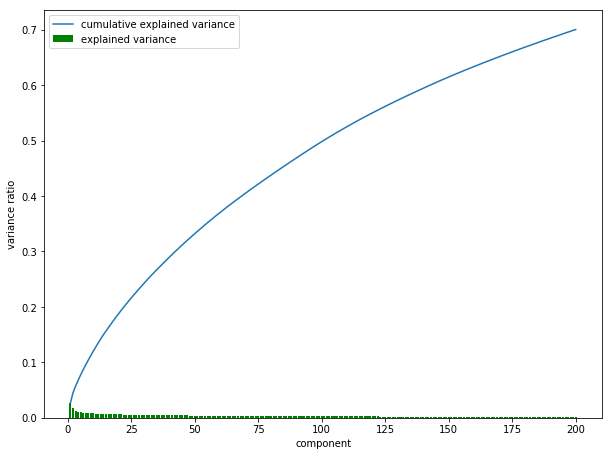

In [216]:
fig = plt.figure(figsize=(10,7.5))
plt.bar(np.array(range(200))+1, 
        SVDs.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(200))+1, 
         np.cumsum(SVDs.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend()
plt.xlabel('component')
plt.ylabel('variance ratio')

In [217]:
np.cumsum(SVD.explained_variance_ratio_)[:5]

array([ 0.54859236,  0.77732273,  0.87630449,  0.93609267,  0.95878444])

That's incredible. Essentially all the variance within the dataset can be explained within the first 5 components.  
  
Looking deeper:

In [119]:
component_names = ["component_"+str(i+1) for i in range(100)]
svd_df = pd.DataFrame(svd_matrix,
                      columns=component_names)
svd_df.insert(0, 'song_id', main_wfeats.index)
svd_df.set_index('song_id', inplace=True)

In [120]:
svd_df.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
song_id,,,,,,,,,,,,,,,,,,,,,
6SluaPiV04KOaRTOIScoff,5628.085550,-1455.967830,-591.084990,195.249912,-109.980003,-138.000730,-196.883405,103.120654,316.349030,-55.480171,...,-0.119182,0.020400,-0.051333,-0.182467,-0.013864,-0.222536,-0.061451,0.101032,-0.088371,0.029476
5qEVq3ZEGr0Got441lueWS,3785.196407,-211.229547,-167.187195,-946.911491,-178.280424,-159.696434,-171.685103,-119.953280,-43.288054,-61.319214,...,0.014816,-0.060850,0.053312,-0.059133,-0.109029,-0.067173,0.045448,-0.016618,-0.006379,0.096851
5kqIPrATaCc2LqxVWzQGbk,6695.418688,1244.686692,199.062403,-931.447960,2088.021162,575.972746,666.106167,85.941169,140.021731,-33.882841,...,0.001544,-0.019518,-0.028554,0.048131,-0.017482,0.057762,0.010967,0.024765,0.003518,-0.050374
3aVyHFxRkf8lSjhWdJ68AW,4079.855317,459.147215,-1032.788016,-235.214500,-159.524049,-12.415382,-285.569560,-11.242166,-232.166253,21.704707,...,0.020243,0.014542,-0.003804,0.009614,0.027030,0.046531,-0.047930,-0.050775,-0.036257,-0.028767
0zIyxS6QxZogHOpGkI6IZH,9129.385371,2138.297222,445.753105,799.044675,-85.261143,-217.045442,-426.144315,238.134729,19.041555,97.474026,...,-0.257065,0.001224,-0.054554,-0.030471,0.035728,-0.138782,0.114014,0.188660,0.041599,0.078849


## Attempt 2 SVD_DF

In [219]:
components_names = ["component_"+str(i+1) for i in range(200)]
svds_df = pd.DataFrame(svds_matrix,
                      columns=components_names)
svds_df.insert(0, 'song_id', main_wfeats.index)
svds_df.set_index('song_id', inplace=True)
svds_df.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_191,component_192,component_193,component_194,component_195,component_196,component_197,component_198,component_199,component_200
song_id,,,,,,,,,,,,,,,,,,,,,
6SluaPiV04KOaRTOIScoff,0.743534,1.410668,-1.917180,-0.475380,0.259663,-1.367565,-1.117980,1.471580,0.987473,-1.497290,...,0.638168,-0.452451,0.167598,0.076392,0.575172,-0.194394,0.672047,1.218646,0.036962,0.861553
5qEVq3ZEGr0Got441lueWS,-3.326578,1.920745,-5.117851,-0.443154,-2.889833,0.277583,-5.538680,2.156642,10.486400,2.421610,...,-0.163978,0.818249,0.262479,0.118323,-0.032054,0.274342,-0.267235,-0.091185,-0.375777,0.001983
5kqIPrATaCc2LqxVWzQGbk,2.725151,-3.546261,-1.925492,-0.168977,0.087735,0.607550,-1.316887,0.286763,-0.702412,-0.652356,...,-5.017539,0.404808,-1.256160,-5.375044,-3.392107,-4.922115,0.620681,4.777259,14.529036,0.661065
3aVyHFxRkf8lSjhWdJ68AW,-3.832625,0.685286,-3.119655,-2.380289,2.378346,-0.420303,0.081030,-0.191729,0.306814,0.414838,...,-6.908684,0.768723,1.591078,2.435395,2.578004,-2.148121,2.199185,-2.133147,1.833510,-0.805120
0zIyxS6QxZogHOpGkI6IZH,3.478944,-4.626297,-2.059679,0.927487,0.505006,-1.477942,-4.207632,0.431254,-0.849075,-2.818599,...,-0.154555,0.089591,-0.041109,0.947847,0.481158,0.314354,-0.702853,-0.700173,1.903341,-0.174240


### Mapping Song Titles back unto Song ID

In [121]:
loadings = pd.DataFrame(SVD.components_,
                        index=component_names,
                        columns=main_wfeats.columns).T

In [122]:
for col in loadings.columns:
    loadings[f'abs_{col}'] = np.abs(loadings[col])

In [123]:
loadings.shape

(650, 200)

In [201]:
loadings.sort_values('abs_component_1',ascending=False).head(10)[['component_1']].T

,tm_dim_2,tv_dim_2,tv_dim_3,tm_dim_3,tv_dim_4,tm_dim_4,album_release_date,tv_dim_6,tm_dim_6,tv_dim_5
component_1,0.424765,0.424765,0.332349,0.332349,0.314083,0.314083,0.30467,0.151766,0.151766,0.121258


In [202]:
loadings.sort_values('abs_component_2',ascending=False).head(10)[['component_2']].T

,tm_dim_2,tv_dim_2,tv_dim_4,tm_dim_4,tm_dim_3,tv_dim_3,tv_dim_6,tm_dim_6,album_release_date,tv_dim_11
component_2,0.542775,0.542775,-0.344341,-0.344341,-0.195451,-0.195451,-0.188849,-0.188849,-0.066308,-0.059558


Timbre tells the story of the two most important components, which together make up a combined 77% of the variance exhibited within this dataset. Specifically, the dimension closet related to the relative "brightness" contributes the most by a considerable margin, both the total mean of the "brightness", and the total variance as measured through each ~ sub 1 second segment of the song.

Dave Samuel, a musician on Quora shared this:

> It's about how sound makes you feel.  
>You know when you've been in the cinema and your eyes are adjusted to the dark, then you step outside into a bright sunny day, only to wince, squint your eyes and feel a bit "attacked"? Well if listening to a piece of audio has a similar effect on you, it is "bright". What this probably means is it has a lot of high frequencies. A cymbal being hit hard is a bright sound. 

### Mapping Song Titles back unto Song ID - Attempt 2

In [221]:
loadings_s = pd.DataFrame(SVDs.components_,
                        index=components_names,
                        columns=main_wfeats.columns).T

In [222]:
for col in loadings_s.columns:
    loadings_s[f'abs_{col}'] = np.abs(loadings_s[col])

In [223]:
loadings.shape

(650, 200)

In [224]:
loadings_s.sort_values('abs_component_1',ascending=False).head(10)[['component_1']].T

,tm_dim_11,tv_dim_11,tv_dim_10,tm_dim_10,tm_dim_8,tv_dim_8,tm_dim_4,tv_dim_4,tv_dim_6,tm_dim_6
component_1,0.201411,0.201411,0.201383,0.201383,0.199087,0.199087,0.197901,0.197901,0.190887,0.190887


In [225]:
loadings_s.sort_values('abs_component_2',ascending=False).head(10)[['component_2']].T

,energy,acousticness,pv_dim_2,pm_dim_2,mean_loudness,loudness,pm_dim_7,pv_dim_7,pv_dim_9,pm_dim_9
component_2,0.244179,-0.195086,0.177021,0.177021,0.172857,0.165107,0.154554,0.154554,0.148209,0.148209


In [1]:
loadings_s.sort_values('abs_component_5', ascending=False).head(10)[['component_5']]

NameError: name 'loadings_s' is not defined

## Precomputing Cosine Similarity Matrix

In [61]:
cos_sim_mat = cosine_similarity(svd_matrix, svd_matrix)
cos_sim_mat.shape

(22901, 22901)

In [226]:
cos_sim_mat_s = cosine_similarity(svds_matrix, svds_matrix)

### Creating a Series of `dicts` for Lookup

In [64]:
main_song_list = pd.read_csv('../data/main_wfeats.csv', index_col='song_id')

In [78]:
song_id_name = dict(zip(main_song_list.index, main_song_list['song_title']))

In [193]:
song_id_artist = dict(zip(main_song_list.index, main_song_list['artist_name']))

In [148]:
song_id_name['6SluaPiV04KOaRTOIScoff']

'Show Me Love - Radio Version'

In [157]:
svd_song_id = dict(zip(svd_df.index, range(svd_df.shape[0])))

In [183]:
svd_song_idr = dict(zip(range(svd_df.shape[0]), svd_df.index))

In [194]:
svd_song_idr

{0: '6SluaPiV04KOaRTOIScoff',
 1: '5qEVq3ZEGr0Got441lueWS',
 2: '5kqIPrATaCc2LqxVWzQGbk',
 3: '3aVyHFxRkf8lSjhWdJ68AW',
 4: '0zIyxS6QxZogHOpGkI6IZH',
 5: '7xYDqpnQdqlgxBDm2ySggl',
 6: '3slY9zt6oUOPDaUwRfgqzH',
 7: '12D0n7hKpPcjuUpcbAKjjr',
 8: '5e0O7MjhNHq9G67qDFM8nR',
 9: '3EcmNKUi5OOWXUGOsxlCca',
 10: '7wmP5E2IfvesUwv08SUm0h',
 11: '0E0aHF7AnmeMNIAb7GJSQa',
 12: '3Hp3C1RbT32Wco0dFCpz5O',
 13: '6ygrn7Of3p3mkP483pO1GT',
 14: '0et5aqL288PmhZOfXoxDhq',
 15: '6Rb4xFCy3Hh5MJ88ehLXdc',
 16: '6wfY8b7te33HW5DAwGuKv3',
 17: '2037Ob3nwf6lnMCByEoTSB',
 18: '0wvIGFIgbyz4JNwQhZgTv2',
 19: '1Me0238KTGrw7POxazgl77',
 20: '3iQvaQVa42xcxzpNSmBcCZ',
 21: '1plCuPFkEbc05PB9np0q1P',
 22: '16E7LWSzLLMPWYGNCwu7Sc',
 23: '44Ljlpy44mHvLJxcYUvTK0',
 24: '4y1LsJpmMti1PfRQV9AWWe',
 25: '2XQY54Im8VrO4sd2tAmiv4',
 26: '1jVWIIa9sYGW4zjF68gtaO',
 27: '2jtZ2d1ZPqpwirNgvZhBnt',
 28: '6D0YimbMAtwY0KJqQw62xa',
 29: '2ZNTPtYmAhN9vCwnAgqKn1',
 30: '39pS70eeDvyCAF3t8NAlVV',
 31: '28SF0lKRqso9SSTDpbv991',
 32: '6gj08XDlv9Du

## Searching for Most Similar Songs (Regardless of Artist)

In [252]:
def feat_sim(song_id, k=20, cos_sim_mat=cos_sim_mat):
    '''
    Returns array of indices for top k songs with greatest similarity to given song, along with 
    their similarity rating, based on precomputed cosine similarity of feature vectors.

    top_songs_feat, top_songs_feat_sim = get_sim.by_feats(ind_song_id, k, cos_sim_mat)

    '''
    top_songs_feat = np.argsort(cos_sim_mat[svd_song_id[song_id]])[-2:-(k+2):-1]
    top_songs_feat_sim = np.sort(cos_sim_mat[svd_song_id[song_id]])[-2:-(k+2):-1]

    return top_songs_feat, top_songs_feat_sim

In [179]:
top_songs_feat, top_songs_feat_sim = feat_sim('6SluaPiV04KOaRTOIScoff')

In [180]:
top_songs_feat

array([18716, 18876,  4009,  7957,  9140, 10296,  9698, 16202, 11310,
       18076, 14464,  4800,  8378, 22322, 18045,  8723, 18600, 14836,
       11385, 18175])

In [248]:
main_song_list.index[main_song_list['artist_id'] == '43sZBwHjahUvgbx1WNIkIz']

Index(['01z3wyn02forxUQHEDAa0R', '42T2QQv3xgBlpQxaSP7lnK',
       '4FzrCRil9uGpGGsnnM0vkE', '0s8OMEGJQJIUr9VFwNEH1v',
       '1ZozJfi8u9cO2Ob8KwiwNT', '35GwlKlVXgFCMF5uTp5r7P',
       '2VSbEXqs6NbNiZSTcHlIDR', '22bX2FwXSvG49G0bPWm5nc',
       '5vRPXm59z8ewWO6WiJHg3m', '0eKyHwckh9vQb8ncZ2DXCs'],
      dtype='object', name='song_id')

## Searching for Most Similar Songs (Must be Different Artist)

In [282]:
cos_sim_mat.shape

(22901, 22901)

In [285]:
def feat_sim_da(song_id, k=20, song_db=main_song_list):
    '''
    Returns array of indices for top k songs with greatest similarity to given song, but only
    from artists who didn't perform the given song, along with 
    their similarity rating, based on precomputed cosine similarity of feature vectors.

    top_songs_feat, top_songs_feat_sim = get_sim.by_feats(ind_song_id, k, cos_sim_mat)

    '''
    artist_id = song_db['artist_id'].loc[song_id]
    artist_songs = song_db.index[song_db['artist_id'] == artist_id].drop(song_id)
    new_svd = svds_df.drop(artist_songs, 0)
    csm = cosine_similarity(new_svd, new_svd)
    
    top_songs_feat = np.argsort(csm[svd_song_id[song_id]])[-2:-(k+2):-1]        
    top_songs_feat_sim = np.sort(csm[svd_song_id[song_id]])[-2:-(k+2):-1]

    return top_songs_feat, top_songs_feat_sim

In [286]:
feat_sim_da('6sbXGUn9V9ZaLwLdOfpKRE')

MemoryError: 

## Function to Derive Most Similar Titles Using Cosine Similarity Matrix

In [267]:
def get_recs(song_id, k=20):
    try:
        top_songs_feat, top_songs_feat_sim = feat_sim(song_id, k)
        return pd.DataFrame([[song_id_name[svd_song_idr[x]] for x in top_songs_feat],
                         [song_id_artist[svd_song_idr[x]] for x in top_songs_feat],
                         [svd_song_idr[x] for x in top_songs_feat],
                         list(top_songs_feat_sim)], 
                        index=['Song Name', 'Artist', 'Song ID', 'Similarity']).T
    except:
        print('No results available for that id. Please refer to the Song Finder for a list of valid ids.')

In [268]:
get_recs('6sbXGUn9V9ZaLwLdOfpKRE')

,Song Name,Artist,Song ID,Similarity
0,Alabaster Box,CeCe Winans,7FLPCH6fx9gJgrRJBoo5U5,0.877043
1,Heads Will Roll,Yeah Yeah Yeahs,18oWEPapjNt32E6sCM6VLb,0.865936
2,"I'm On Fire - From ""Fifty Shades Of Grey"" Soun...",AWOLNATION,2lthIdb19OihVQMfuPaRZ6,0.863646
3,Garden Party,Ricky Nelson,7J5tyfg3OYVNR97KH66ovw,0.84893
4,We're Off to See the Wizard,Judy Garland,1lP1Ch077UUOpNouwBBYyl,0.846745
5,Move In My Direction,Bananarama,3c5a3kc9n4qLkZj3IWNtLe,0.833622
6,That Time Of The Month,Harley Poe,7dWYhwVvcWIKsXaPBLdDHg,0.824771
7,I Love You Always Forever,Donna Lewis,1PEqh7awkpuepLBSq8ZwqD,0.82404
8,Up Down (Do This All Day),T-Pain,6lbhWl34Il0WXm5pX1fM9E,0.822036
9,Supergroovalisticprosifunkstication (The Bumps...,Parliament,0HMn6Mj64KFPE0FYivxt3c,0.818102


In [232]:
get_recs('6sbXGUn9V9ZaLwLdOfpKRE')

,Song Name,Artist,Song ID,Similarity
0,It's Gonna Be Me,*NSYNC,2AW37v0bDyuOzGP3XnmFuA,0.850328
1,Tearin' up My Heart - Radio Edit,*NSYNC,594M0rqYMOo8BhMGEdoi5C,0.755491
2,As Long as You Love Me,Backstreet Boys,00WvmRXTkPBZNhhRK3xfdy,0.749165
3,Every Six Seconds,O-Town,2Gm0dh8gnGqelvChn2x4KK,0.719145
4,Don't Go Breaking My Heart,Backstreet Boys,79Mjfhh393dZdAsTvUFDR6,0.714671
5,I Want You Back - Radio Edit,*NSYNC,5YTMRAT4yKgFrepF8Hi3mY,0.707345
6,Everybody (Backstreet's Back) - Radio Edit,Backstreet Boys,4rTeOSYqwXNz5qPR2DUTFZ,0.704542
7,Everybody (Backstreet's Back) - Extended Version,Backstreet Boys,5WTxbyWTpoqhdxEN2szOnl,0.702513
8,"Always Know Where You Are - From ""Treasure Pla...",BBMak,02k3lrWVf8XHIHmBojESIn,0.699618
9,True To Your Heart,98º,7dPS5GUShBVTcAhM1nLRF9,0.690668


In [241]:
get_recs('66ezChUOWvgzRQAi3Ay1wt', 80).iloc[50:, :]

,Song Name,Artist,Song ID,Similarity
50,40 Oz.,D12,3SNIM6IPegio1UqXCYAhoc,0.682224
51,Fantastic Voyage,Coolio,3QlTzofanSqDWywxEzGGE2,0.68038
52,We All Die One Day,Obie Trice,5rurZZeggozpAZIHbI55cm,0.679931
53,I’m On Everything,Bad Meets Evil,3qBxoudRLiLbFl7Ansz1Uh,0.679598
54,California Love - Original Version,2Pac,1JClFT74TYSXlzpagbmj0S,0.664299
55,Real Muthaphuckkin' G's,Eazy-E,53BZ6XygAoubR5DU5w38Vq,0.662093
56,So Good (& Metro Boomin),Big Sean,0fWBFDRTIuk8ZgNdZqhCer,0.654352
57,Go Legend (& Metro Boomin),Big Sean,3wAI7MIQtTgwcRmwchPZBc,0.649675
58,Who Am I (What's My Name)?,Snoop Dogg,5XhkV07Vou38wnrzwURUOC,0.647078
59,The Setup,Obie Trice,6uzesxG4dlBg3faZmzL6Qs,0.641862


In [240]:
get_recs('0eKyHwckh9vQb8ncZ2DXCs', 100).iloc[80:, :]

,Song Name,Artist,Song ID,Similarity
80,45,Shinedown,420JGkyLfLUZcgBHKiIK9v,0.602134
81,Call Me,Shinedown,2nBWxgSZ79w9l6t2rUg6pl,0.601257
82,The Day I Tried To Live,Soundgarden,78YJJJH55MSyk7547100sW,0.600679
83,Sound Of A Gun,Audioslave,3zFG5dyH5rJfkZ25fgR173,0.600597
84,Surround Me,Scott Stapp,7CfJG9Kty5UVywjsEFRU9f,0.599598
85,Take Out the Gunman,Chevelle,1z7rvZQkZM1gdSp3meW3dW,0.598424
86,Hunger Strike - 25th Anniversary Mix,Temple Of The Dog,3CtphwpjC0XjIVpLFvGiQR,0.598107
87,TalkTalk,A Perfect Circle,3sPpTsMNzlyJJx9LLJFT0e,0.596926
88,Away From The Sun,3 Doors Down,3THdexHRmED4euIY91Zrxc,0.596529
89,December,Collective Soul,2PrUKG4kAO27esFEtQu9rL,0.596021


## Song Finder - An Easy Lookup Tool to Find Songs for Recommendations

In [ ]:
def song_finder(query, type='artist'):
    '''
    Retrieves song name and song id for a requested recording currently indexed
    '''
    